# Inflação no Brasil (2003-2022)

**Neste projeto vamos analisar a evolução da inflação no Brasil, medida pelo IPCA (Índice de Preços ao Consumidor Amplo), que considera uma cesta de consumo ponderada para famílias com uma renda entre 1 e 40 salários mínimos.
O intúito final do projeto é identificar o comportamento nos preços dos diferentes itens que compõe o índice.**

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Trabalharemos com um banco de dados com as taxas de variação do IPCA proveniente do registro de séries temporais do Banco Central do Brasil. No excel, criamos um índice numérico (2003 = 100) para o IPCA e cada um de seus itens.**

In [2]:
# importando dados
ipca = pd.read_csv('ipca_var.csv')
display(ipca)

,Date,geral,alimentos,habitacao,artigos_residencia,vestuario,transporte,comunicacao,saude,gastos_pessoais,educacao
0,01/2003,2.25,2.15,1.76,1.90,0.94,4.20,0.32,1.44,1.94,1.23
1,02/2003,1.57,1.22,0.18,1.57,0.11,3.00,3.24,0.67,0.64,5.64
2,03/2003,1.23,1.66,1.09,1.19,0.60,0.70,1.58,2.39,0.72,0.92
3,04/2003,0.97,1.01,1.95,0.82,1.03,0.50,0.14,1.54,0.35,0.43
4,05/2003,0.61,0.63,2.27,0.29,1.14,-0.32,0.03,0.71,0.11,0.22
...,...,...,...,...,...,...,...,...,...,...,...
230,03/2022,1.62,2.42,1.15,0.57,1.82,3.02,-0.05,0.88,0.59,0.15
231,04/2022,1.06,2.06,-1.14,1.53,1.26,1.91,0.08,1.77,0.48,0.06
232,05/2022,0.47,0.48,-1.70,0.66,2.11,1.34,0.72,1.01,0.52,0.04
233,06/2022,0.67,0.80,0.41,0.55,1.67,0.57,0.16,1.24,0.49,0.09


In [3]:
# converter coluna com as datas para o formato datetime64
datas = pd.to_datetime(ipca['Date'])
ipca['Date'] = datas
# transformando a coluna data na coluna índice do dataframe
ipca = ipca.set_index('Date')
display(ipca.head())

,geral,alimentos,habitacao,artigos_residencia,vestuario,transporte,comunicacao,saude,gastos_pessoais,educacao
Date,,,,,,,,,,
2003-01-01,2.25,2.15,1.76,1.90,0.94,4.20,0.32,1.44,1.94,1.23
2003-02-01,1.57,1.22,0.18,1.57,0.11,3.00,3.24,0.67,0.64,5.64
2003-03-01,1.23,1.66,1.09,1.19,0.60,0.70,1.58,2.39,0.72,0.92
2003-04-01,0.97,1.01,1.95,0.82,1.03,0.50,0.14,1.54,0.35,0.43
2003-05-01,0.61,0.63,2.27,0.29,1.14,-0.32,0.03,0.71,0.11,0.22


In [4]:
# verificando informações sobre o dataframe
ipca.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2003-01-01 to 2022-07-01
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geral               235 non-null    float64
 1   alimentos           235 non-null    float64
 2   habitacao           235 non-null    float64
 3   artigos_residencia  235 non-null    float64
 4   vestuario           235 non-null    float64
 5   transporte          235 non-null    float64
 6   comunicacao         235 non-null    float64
 7   saude               235 non-null    float64
 8   gastos_pessoais     235 non-null    float64
 9   educacao            235 non-null    float64
dtypes: float64(10)
memory usage: 20.2 KB


**Note que não há valores nulos e todas as variáveis estão no formato desejado (float64). Assim, podemos continuar.**

**O objetivo agora é criar um dataframe contendo a evolução do número índice de cada item do IPCA**

In [5]:
# definindo função
def index_num(df_column):
    '''transforma uma coluna de variações percentuais em uma pd.series contendo a série temporal do número índice
    :df_column: pd.series contendo as variações percentuais
    :return: pd.series com numeros indice'''
    index_num = [100]
    for i in df_column:
        x = index_num[-1] * (1+i/100)
        index_num.append(x)
    return pd.Series(index_num)

In [6]:
index_num(ipca['geral'])

0      100.000000
1      102.250000
2      103.855325
3      105.132745
4      106.152533
          ...    
231    309.641964
232    312.924169
233    314.394912
234    316.501358
235    314.349149
Length: 236, dtype: float64

**Fazendo isso com todas as colunas do df ipca e criando um novo df chamado ipca_indice temos**

In [7]:
ipca_indices = pd.DataFrame(ipca.index)
for j in ipca.columns:
    ipca_indices[f'{j}'] = (index_num(ipca[j]))
ipca_indices

,Date,geral,alimentos,habitacao,artigos_residencia,vestuario,transporte,comunicacao,saude,gastos_pessoais,educacao
0,2003-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,2003-02-01,102.250000,102.150000,101.760000,101.900000,100.940000,104.200000,100.320000,101.440000,101.940000,101.230000
2,2003-03-01,103.855325,103.396230,101.943168,103.499830,101.051034,107.326000,103.570368,102.119648,102.592416,106.939372
3,2003-04-01,105.132745,105.112607,103.054349,104.731478,101.657340,108.077282,105.206780,104.560308,103.331081,107.923214
4,2003-05-01,106.152533,106.174245,105.063908,105.590276,102.704411,108.617668,105.354069,106.170536,103.692740,108.387284
...,...,...,...,...,...,...,...,...,...,...,...
230,2022-03-01,304.705731,371.497838,338.823224,185.992506,271.874688,262.475511,173.202387,313.395286,357.593665,358.891443
231,2022-04-01,309.641964,380.488085,342.719692,187.052663,276.822807,270.402271,173.115786,316.153164,359.703468,359.429780
232,2022-05-01,312.924169,388.326140,338.812687,189.914569,280.310774,275.566955,173.254279,321.749075,361.430044,359.645438
233,2022-06-01,314.394912,390.190106,333.052871,191.168005,286.225332,279.259552,174.501710,324.998741,363.309481,359.789296


In [8]:
ipca_indices = ipca_indices.set_index('Date')
ipca_indices.head()

,geral,alimentos,habitacao,artigos_residencia,vestuario,transporte,comunicacao,saude,gastos_pessoais,educacao
Date,,,,,,,,,,
2003-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2003-02-01,102.250000,102.150000,101.760000,101.900000,100.940000,104.200000,100.320000,101.440000,101.940000,101.230000
2003-03-01,103.855325,103.396230,101.943168,103.499830,101.051034,107.326000,103.570368,102.119648,102.592416,106.939372
2003-04-01,105.132745,105.112607,103.054349,104.731478,101.657340,108.077282,105.206780,104.560308,103.331081,107.923214
2003-05-01,106.152533,106.174245,105.063908,105.590276,102.704411,108.617668,105.354069,106.170536,103.692740,108.387284


**Podemos visualizar a evolução de cada uma das séries temporáis em um gráfico de linhas.**

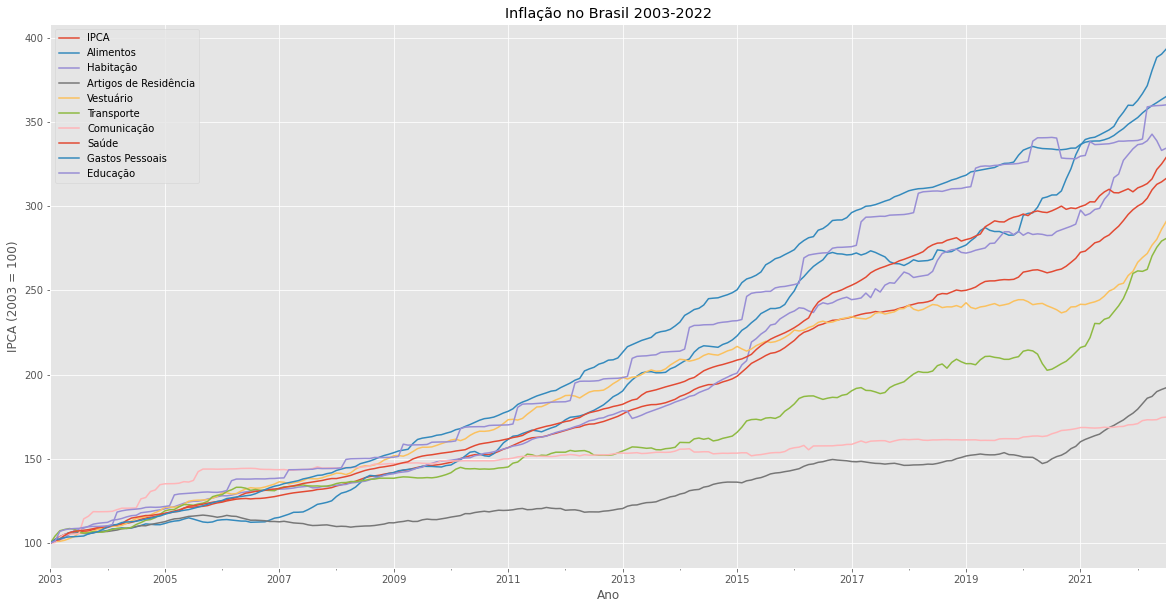

In [9]:
plt.style.use('ggplot')
# plotando o gráfico
ipca_indices.plot(figsize=(20,10))
# definindo labels, título e legenda
plt.xlabel('Ano')
plt.ylabel('IPCA (2003 = 100)')
plt.title('Inflação no Brasil 2003-2022')
plt.legend(['IPCA', 'Alimentos', 'Habitação', 'Artigos de Residência', 'Vestuário', 'Transporte', 'Comunicação', 'Saúde', 'Gastos Pessoais', 'Educação'])

plt.show()

**Este gráfico é interessante, porém não revela muita coisa. Seria interessante visualizar a evolução individual nos preços de cada item quando comparado ao restante da economia. Para isso, faremos algo como "deflacionar" os índices à partir do índice numérico do IPCA.**

In [10]:
ipca_def = (ipca_indices.div(ipca_indices['geral'], axis=0) - 1) * 100
ipca_def

,geral,alimentos,habitacao,artigos_residencia,vestuario,transporte,comunicacao,saude,gastos_pessoais,educacao
Date,,,,,,,,,,
2003-01-01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2003-02-01,0.0,-0.097800,-0.479218,-0.342298,-1.281174,1.907090,-1.887531,-0.792176,-0.303178,-0.997555
2003-03-01,0.0,-0.442052,-1.841174,-0.342298,-2.700190,3.341836,-0.274379,-1.671245,-1.216027,2.969561
2003-04-01,0.0,-0.019155,-1.976926,-0.381677,-3.305731,2.800780,0.070420,-0.544491,-1.713704,2.654234
2003-05-01,0.0,0.020453,-1.025529,-0.529669,-3.248271,2.322258,-0.752185,0.016960,-2.317225,2.105226
...,...,...,...,...,...,...,...,...,...,...
2022-03-01,0.0,21.920200,11.196866,-38.959958,-10.774672,-13.859346,-43.157489,2.851786,17.357053,17.782964
2022-04-01,0.0,22.880013,10.682573,-39.590661,-10.599066,-12.672602,-44.091626,2.102816,16.167545,16.079157
2022-05-01,0.0,24.095924,8.273096,-39.309715,-10.422140,-11.938104,-44.633782,2.820142,15.500840,14.930540


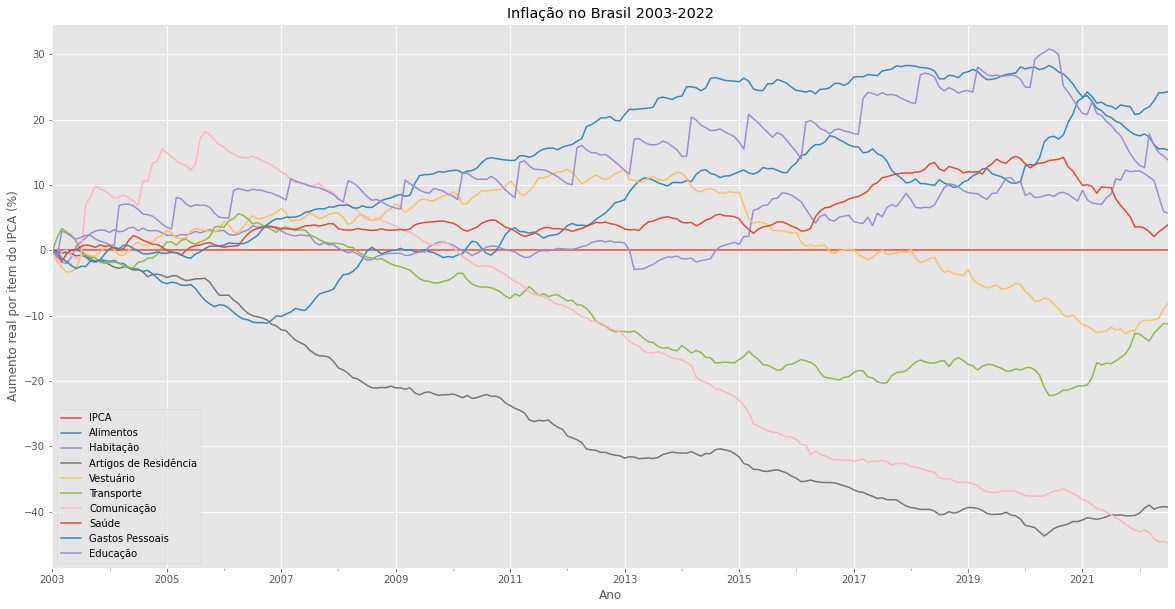

In [11]:
plt.style.use('ggplot')
# plotando o gráfico
ipca_def.plot(figsize=(20,10))

plt.xlabel('Ano')
plt.ylabel('Aumento real por item do IPCA (%)')
# definindo labels, título e legenda
plt.title('Inflação no Brasil 2003-2022')
plt.legend(['IPCA', 'Alimentos', 'Habitação', 'Artigos de Residência', 'Vestuário', 'Transporte', 'Comunicação', 'Saúde', 'Gastos Pessoais', 'Educação'])

plt.show()

**Note que agora temos uma reta vermelha sobre o eixo X que é exatamente o Índice do IPCA. Podemos ver que muitos itens ficaram bem mais caros, como educação e gastos pessoais, mas principalmente alimentação, onde houve um crescimento real de quase 30% nos preços. Enquanto isso, outros itens ficaram muito mais baratos, como comunicação e artigos de residência, com uma redução real nos preços de quase 40%.**